# Load Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare/collect data

In [3]:
import os
path = os.listdir('datasets/Training/')
classes = {'Fish':0, 'Human':1}

In [4]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'datasets/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [5]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)



In [6]:
np.unique(Y)

array([0, 1])

In [7]:
pd.Series(Y).value_counts()

1    4306
0    1230
dtype: int64

In [8]:
X.shape, X_updated.shape

((5536, 200, 200), (5536, 40000))

# Visualize data

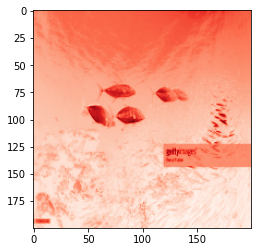

In [9]:
plt.imshow(X[0], cmap='Reds')

# Prepare data

In [10]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(5536, 40000)

# Split Data

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=0.30)

In [12]:
xtrain.shape, xtest.shape

((3875, 40000), (1661, 40000))

# Feature Scaling

In [13]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


# Feature Selection: PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
print(xtrain.shape, xtest.shape)
pca = PCA(.98)
pca_train = xtrain
pca_test = xtest

(3875, 40000) (1661, 40000)


# Train Model

In [16]:
from sklearn.svm import SVC

In [17]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

# Evaluation

In [18]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9594838709677419
Testing Score: 0.921733895243829


# Prediction

In [19]:
pred = sv.predict(xtest)

# Confusion Matrix

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

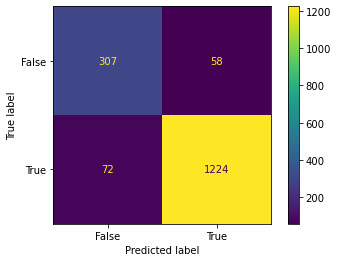

In [24]:
conf_matrix=metrics.confusion_matrix(ytest,pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix =conf_matrix , display_labels = [False, True])
cm_display.plot()
plt.show()

# Precision

In [25]:
precision=metrics.precision_score(ytest,pred)
print(precision)

<IPython.core.display.Javascript object>

0.9547581903276131


# Recall

In [26]:
recall=metrics.recall_score(ytest,pred)
print(recall)

<IPython.core.display.Javascript object>

0.9444444444444444


# Accuracy

In [27]:
accuracy=metrics.accuracy_score(ytest,pred)
print(accuracy)

<IPython.core.display.Javascript object>

0.921733895243829


# Test Model



In [21]:
dec = {0:'Fish', 1:'Human'}

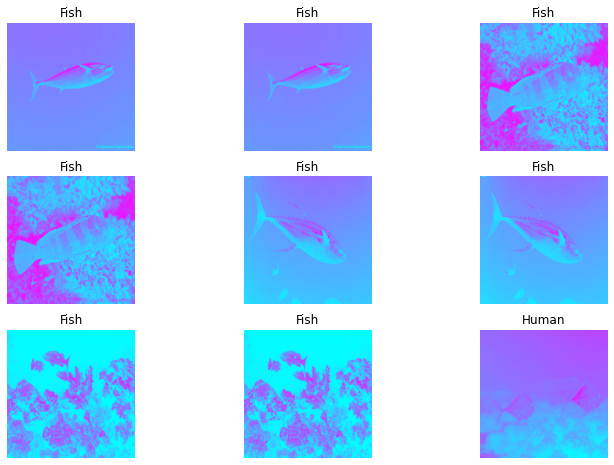

In [22]:
plt.figure(figsize=(12,8))
p = os.listdir('datasets/Testing/')
c=1
for i in os.listdir('datasets/Testing/Fish/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('datasets/Testing/Fish/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='cool')
    plt.axis('off')
    c+=1

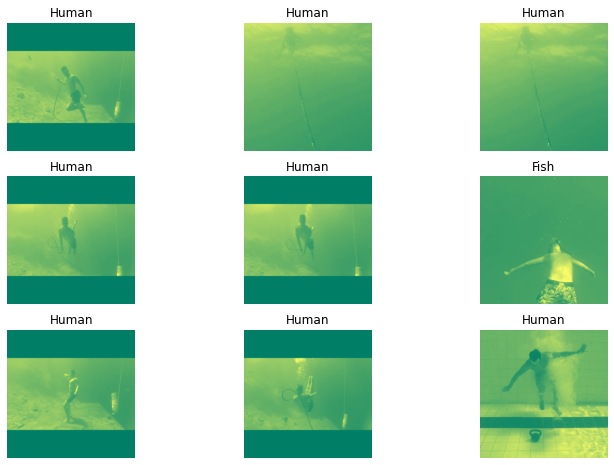

In [24]:
plt.figure(figsize=(12,8))
p = os.listdir('datasets/Testing/')
c=1
for i in os.listdir('datasets/Testing/Human/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('datasets/Testing/Human/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='summer')
    plt.axis('off')
    c+=1